In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd

In [7]:
import matplotlib.pyplot as plt

In [8]:
import numpy as np

In [9]:
from scipy.io import arff

In [10]:
data = arff.loadarff(r'C:\Users\lenovo\Desktop\Autism-Adolescent-Data Plus Description\Autism-Adolescent-Data.arff')
df = pd.DataFrame(data[0])

str_df = df.select_dtypes([np.object])
str_df = str_df.stack().str.decode('utf-8').unstack()             #Bytes yapısından çevrim için
for col in str_df:
    df[col] = str_df[col]

df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,0,0,0,1,1,1,1,1,1,0,...,m,Hispanic,yes,yes,Austria,no,6.0,12-16 years,Parent,NO
1,0,0,0,0,0,0,0,0,1,1,...,m,Black,no,no,Austria,no,2.0,12-16 years,Relative,NO
2,0,0,0,0,0,0,0,0,1,1,...,f,?,no,no,AmericanSamoa,no,2.0,12-16 years,?,NO
3,0,1,1,1,1,1,0,1,1,0,...,f,White-European,no,no,United Kingdom,no,7.0,12-16 years,Self,YES
4,1,1,1,1,1,1,1,0,0,0,...,f,?,no,no,Albania,no,7.0,12-16 years,?,YES


# Veriyi tanıyalım

ASD(Otistik Spektrum Bozukluğu) insan sağlığını önemli ölçüde etkileyen bazı semptomlara sahip bir sinirsel gelişim bozukluğudur ve erken teşhis birçok durumda bu semptomların azaltılmasında etkili olmaktadır. Günümüz koşullarında dahi bu hastalıkla ilgili test prosedürleri çokça zaman almakta ve maliyet olarak efektif olamamaktadır. Bu projenin amacı eldeki bazı verilerle bu hastalık hakkında yüksek bir başarı oranıyla ve hızlı şekilde pozitif/negatif teşhis tespiti yapmaya çalışmaktır. 

Kaynak: https://archive.ics.uci.edu/ml/datasets/Autistic+Spectrum+Disorder+Screening+Data+for+Adolescent+++

Görüldüğü üzere datasetimizde class labelı dahil olmak üzere 104 sample'a ait 21 adet feature var. Bunlar sırasıyla:

A1_Score

A2_Score

A3_Score

A4_Score                         A ile başlayan featurelar test sorusuna verilen cevabı göstermektedir(0,1)

A5_Score

A6_Score

A7_Score

A8_Score

A9_Score

A10_Score

age = Yaş

gender = Cinsiyet

ethnicity = Irk

jundice = Sarılık ile doğup doğmama

austim = Yakın akrabalarda bulunma bilgisi

contry_of_res = Yaşanılan ülke

used_app_before = Daha önce bir tanı uygulamasına girip girmeme bilgisi

result = Testten alınan nümerik sonuç

age_desc = Yaş aralığı

relation = Testi tamamlayan yakın akraba bilgisi

Class/ASD = ASD'ye sahip olup olmadığı bilgisi

etiketlerine sahipler. 

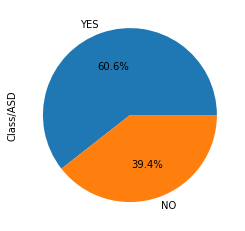

In [11]:
graf = df['Class/ASD'].value_counts().plot( kind = "pie", autopct = "%.1f%%")

Test ettiğimiz üzere 63 adet ASD teşhisi konmuş, 41 adet konmamış sample'a sahibiz.

In [13]:
df[df == '?'].count()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          6
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           6
Class/ASD          0
dtype: int64

Datasette ethnicity değeri missing olan 6, relation değeri missing olan 6 adet sample'ımız var.Nümerik olmadıkları için soru işareti yerine rastgele bir değer koymamız sonuca etki edebilir. Missing value içeren çok fazla sample olmadığı için bu sample'ları droplamamız en doğrusu olacaktır.

In [14]:
df = df[df.ethnicity != '?']
df = df[df.relation != '?']          #Missing value içeren sample'lar datasetten çıkarılıyor.
num_rows = df.shape[0] 
print(num_rows)

98


Böylelikle datasetimizden 6 adet sample'ı kayıp değerler yüzünden çıkarmak durumunda kaldığımızı görmüş olduk.

In [75]:
df.dtypes

A1_Score            object
A2_Score            object
A3_Score            object
A4_Score            object
A5_Score            object
A6_Score            object
A7_Score            object
A8_Score            object
A9_Score            object
A10_Score           object
age                float64
gender              object
ethnicity           object
jundice             object
austim              object
contry_of_res       object
used_app_before     object
result             float64
age_desc            object
relation            object
Class/ASD           object
dtype: object

Görüldüğü üzere 19 adet NumPy object'i ve 2 adet float cinsinden attribute'a sahibiz.

## Outlier Analizi

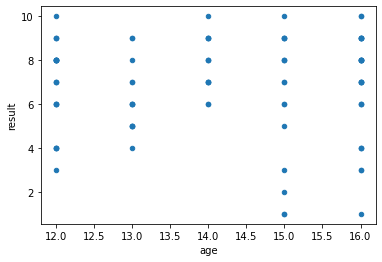

In [88]:
ax1 = df.plot.scatter(x='age',
                      y='result')

Grafikten de anlaşılabileceği gibi nümerik attribute'lar : age için sınırlar [12-16] result için [1-10]'dur ve herhangi bir outlier içermemektedir.

## Teste Girenlerin Genel Özellikleri

In [91]:
df.contry_of_res.value_counts().head()

United Kingdom    29
United States     12
Argentina         10
India              7
Austria            5
Name: contry_of_res, dtype: int64

İlgili setteki teste giren kişilerin ülkelere göre dağılımı, en çok denek içeren 5 ülke ve kişi sayıları görülüyor.

In [93]:
df.gender.value_counts()

m    49
f    49
Name: gender, dtype: int64

Datasette bilgileri olan 98 kişinin 49'u erkek, 49'u kadındır.

In [96]:
df.ethnicity.value_counts()

White-European     40
Asian              16
Others             12
Middle Eastern      9
Black               8
Latino              5
Hispanic            5
South Asian         3
Name: ethnicity, dtype: int64

Teste giren kişilerin ırk dağılımları ve ırka bağlı olarak toplam sayıları.

In [95]:
df.age.value_counts()

16.0    29
12.0    24
15.0    17
13.0    14
14.0    14
Name: age, dtype: int64

Teste giren kişilerin sayı ve yaş dağılımları.

In [97]:
df.relation.value_counts()

Self                        45
Parent                      36
Relative                     8
Health care professional     6
Others                       3
Name: relation, dtype: int64

Teste tabi tutulan kişilerin 45'i testi kendi doldurmuş, 53'ü ise bir yakını aracılığıyla bu işlemi gerçekleştirmiştir.

# Label Encoding
Datamızla ilgili işlemleri yapabilmemiz için categorical ve diğer nümerik olmayan feature'lara encoding işlemi uygulamamız gerekiyor.

In [25]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
categorical_features = df.select_dtypes(include="object").columns
column_trans = make_column_transformer(
    (OneHotEncoder(), categorical_features),
    remainder='passthrough')

In [26]:
column_trans.fit_transform(df)

array([[0., 0., 0., ..., 1., 2., 0.],
       [0., 0., 0., ..., 1., 3., 0.],
       [0., 1., 1., ..., 1., 4., 1.],
       ...,
       [1., 0., 0., ..., 1., 4., 1.],
       [1., 1., 0., ..., 1., 4., 0.],
       [1., 0., 1., ..., 1., 2., 0.]])

In [27]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df['Class/ASD']= label_encoder.fit_transform(df['Class/ASD']) 

In [28]:
objList = df.select_dtypes(include = "object").columns

In [29]:
for i in objList:
    df[i] = label_encoder.fit_transform(df[i].astype(str))

In [30]:
d = dict.fromkeys(df.select_dtypes(np.int64).columns, np.int32)
df = df.astype(d)

Encoding sonrası data setimizin son durumu :

In [31]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,0,0,0,1,1,1,1,1,1,0,...,1,2,1,1,5,0,6.0,1,2,0
1,0,0,0,0,0,0,0,0,1,1,...,1,1,0,0,5,0,2.0,1,3,0
3,0,1,1,1,1,1,0,1,1,0,...,0,7,0,0,29,0,7.0,1,4,1
7,1,1,0,1,1,0,1,1,0,1,...,0,4,0,0,4,0,7.0,1,2,1
8,1,1,1,1,1,1,0,0,0,0,...,1,1,1,1,8,0,6.0,1,2,0


Datasetteki her feature ve class değeri encode edilerek sayısal değerlere çevirilmiştir. Bu noktadan sonra dataset makine öğrenmesi yöntemlerine bu şekilde parametre olarak girecek.

## Özelliklerin Birbiriyle ve Sonuçla Olan İlişkileri

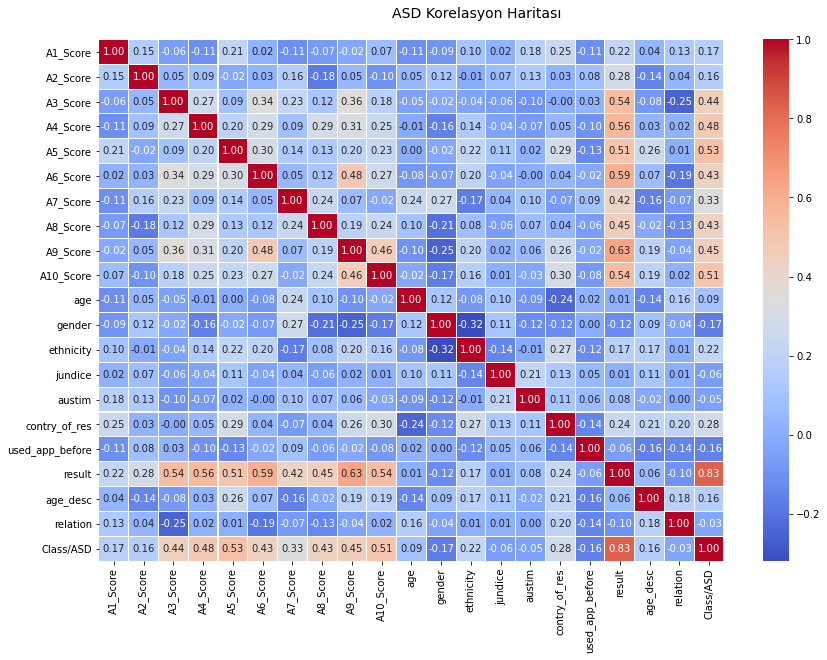

In [38]:
import seaborn as sns
X = df.drop('Class/ASD', axis = 'columns')
y = df['Class/ASD']
f, ax = plt.subplots(figsize=(14, 9))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('ASD Korelasyon Haritası', fontsize=14)

Korelasyon grafiğimizde A testlerinin test sonucuna olan etkisinin büyüklüğünü ve test sonucu 'result' un ASD teşhisi koymamızda büyük etkisi olduğunu görebiliyoruz.

# Özelliklerin sonuca olan etkisinin analizi

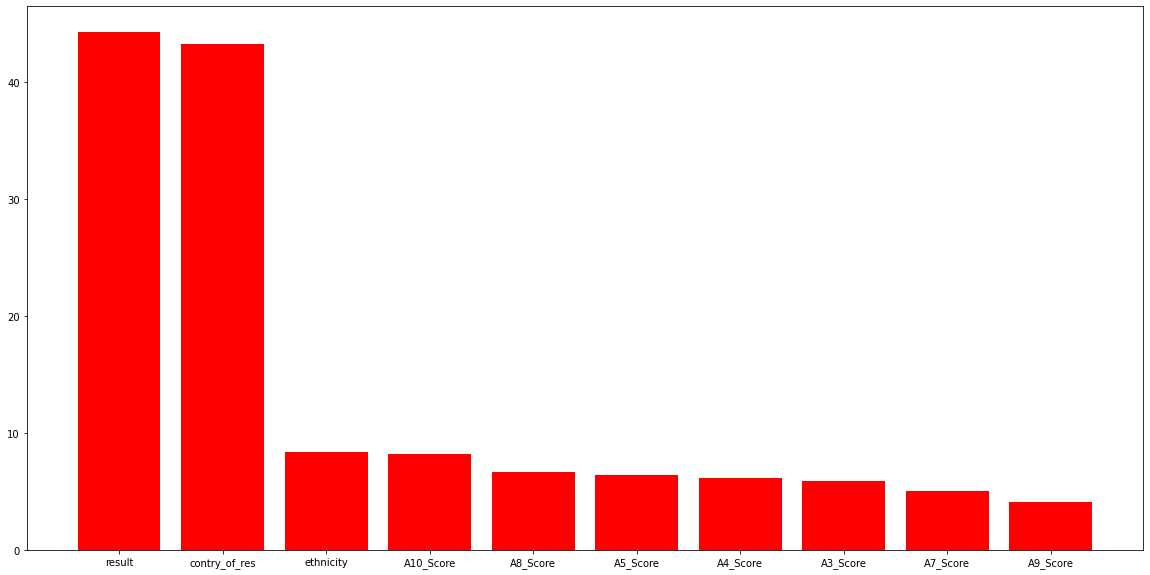

In [37]:
from sklearn.feature_selection import SelectKBest, chi2
X_new = SelectKBest(chi2, k='all').fit(X, y)
indices = np.argsort(X_new.scores_)[::-1]
features = []
for i in range(10):
    features.append(X.columns[indices[i]])
    
plt.figure(figsize=(20,10))
plt.bar(features, X_new.scores_[indices[range(10)]], color='r', align='center')
plt.show()

SelectKBest'e göre sonuca en çok etki eden feature'lar ve skorları yukarıda sıralanmıştır. Korelasyon analizinden farklı olarak girdikleri testin sonucu(result) ile yaşadıkları ülkenin sonuca olan etkilerinin birbirine yakın olması dikkat çekici.

# Sınıflandırma İşlemleri
## 1)Logistic Regression

Lojistik regresyon hedef değişkenin olasılığını tahmin etmek için kullanılan supervised bir sınıflandırma algoritmasıdır. Hedef değişken genellikle ikili bir yapıya sahiptir, yani sonucumuz iki sonuçtan birine dahil olmaktadır.

Bu sonuç 1 veya 0, Evet veya Hayır, Başarılı veya Başarısız, Kanser veya Değil veya bugün kullanacağımız data setindeki gibi Hasta/Değil gibi değerler alabilir.

Matematiksel açıdan lojistik regresyon bu hedef değerini X verisetinin bir fonksiyonu olarak değerlendirir. Spam tespiti,diyabet tahmini, kanser tespiti gibi konularda kullanılan çok basit fakat etkili bir makine öğrenmesi algoritmasıdır.

In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
logreg = LogisticRegression(solver='lbfgs', max_iter = 2000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 41)

In [191]:
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)

In [190]:
result = logreg.score(X_test, y_test)
result = result*100.0
print("Accuracy: %.2f%%" % (result))

Accuracy: 95.00%


Logistic Regression bu dataset için %95 gibi yüksek bir başarı oranı yakaladı. Confusion Matrix'e bakalım :

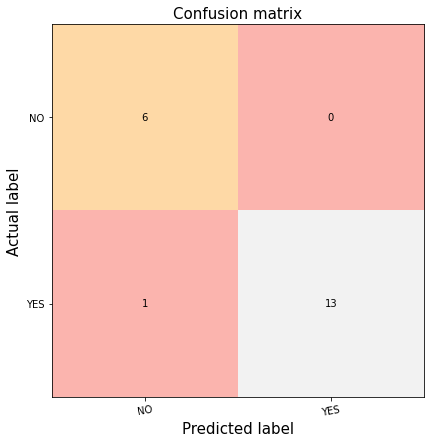

In [206]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["NO", "YES"], rotation=10, size = 10)
plt.yticks(tick_marks, ["NO", "YES"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

## Sınıflandırma Performansı Ölçütleri

In [204]:
Precision = 13/(13)
Recall = 13/(13+1)
Specificity = 6/6
print('%',result)
print(Precision)
print(Recall)
print(Specificity)

% 95.0
1.0
0.9285714285714286
1.0


Precision = %100 Recall = %93 Specificity = %100

## 2)Random Forest

Random forest supervised bir makine öğrenmesi algoritmasıdır. Hem sınıflandırma hem regresyon işlemlerinde sıkça kullanılır. Adı üstünde random forest'ler birçok decision tree'den oluşur ve ormandaki ağaç sayısı ne kadar çoksa orman o kadar güçlü sayılır. Random forest algoritması rastgele seçilen data örneklerinden ağaçlar yaratır(estimator dediğimiz kısım), her birinden tahminler alır ve en başarılı olanını seçer. Özelliklerin sonuca olan etkisi açısından da iyi bir ayraç olarak kullanılabilir.

In [258]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
rFor = RandomForestClassifier(n_estimators=5)
rFor.fit(X_train, y_train)
predictions = rFor.predict(X_test)

In [259]:
result = rFor.score(X_test, y_test)
result = result*100.0
print("Accuracy: %.2f%%" % (result))

Accuracy: 90.00%


Random Forest Classification 5 estimator ile %90 gibi yüksek bir başarı oranı yakaladı, estimator sayısı 1'ken %65, 20'yken %100 gibi bir oran yakalanabiliyor fakat sample sayısı düşük olduğu için ufak değişimler başarı oranına büyük etkide bulunabiliyor. Confusion Matrix'e bakalım:

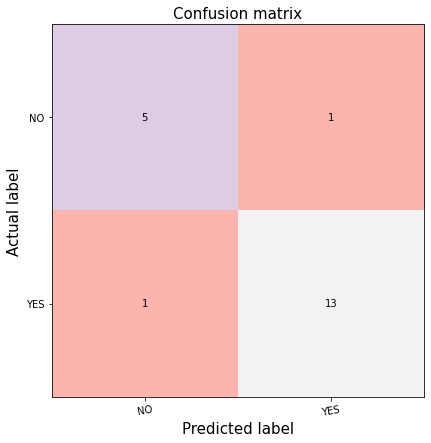

In [260]:
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["NO", "YES"], rotation=10, size = 10)
plt.yticks(tick_marks, ["NO", "YES"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

## Sınıflandırma Performansı Ölçütleri

In [303]:
Precision = 13/(13+1)
Recall = 13/(13+1)
Specificity = 5/(5+1)
print('%',result)
print(Precision)
print(Recall)
print(Specificity)

% 90.0
0.9285714285714286
0.9285714285714286
0.8333333333333334


Precision = %92
Recall = %92
Specificity = %83

In [274]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [288]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [291]:
pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24572 sha256=a3d00eb7142168d3a69f196c2c30f66272bb427a19678883be005037dc402eb6
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplusNote: you may need to restart the kernel to use updated packages.



In [296]:
conda install graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\lenovo\anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.2                |   py38haa95532_0         2.9 MB
    graphviz-2.38              |       hfd603c8_2        29.3 MB
    ------------------------------------------------------------
                                           Total:        32.2 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.9.2-py38haa244fe~ --> pkgs/main::conda-4.9.2-py38haa95532_0
  graphviz           conda-forge::graphviz-2.38.0-h6538335~ --> pkgs/main::graphviz-2.38-hfd603c8_2


Note: you may need to restart the kernel to use updated packages.


graphviz-2.38        | 29.3 MB   |            |   0% 
graphviz-2.38        | 29.3 MB   |        

Random Forest'teki örnek bir ağacı inceleyelim :

In [301]:
estimator = rFor.estimators_[2]
from sklearn.tree import export_graphviz
import os
import pydotplus

# Export as dot file
export_graphviz(estimator, out_file='C:\\Users\\lenovo\\Desktop\\tree.dot', 
                feature_names = df.drop('Class/ASD', axis = 'columns').columns.values,
                class_names = ['NO','YES'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)


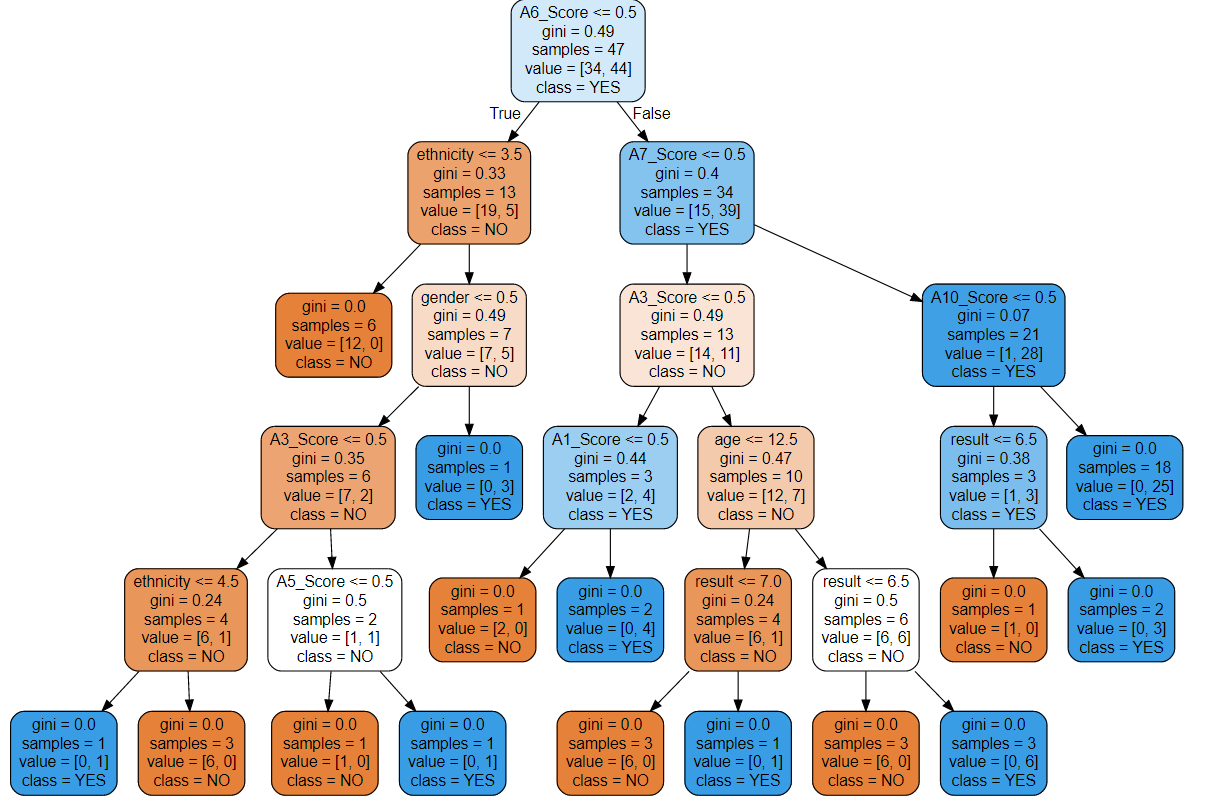

In [302]:
from IPython.display import Image
Image(filename = 'C:\\Users\\lenovo\\Desktop\\randomtree.png')

Random Forest'ten seçilmiş 2.estimator'un değerleri yukarıdaki gibi çıktı. 'tree.dot' dosyası içerisine yazılan değerler http://webgraphviz.com/ kullanılarak görselleştirildi. 

## 3)Naive Bayes

Naive Bayes, temelde Bayes Teorisine dayanan istatistiksel bir sınıflandırma yöntemidir. Supervised algoritmalar arasındaki en basit uygulamalardan birine sahiptir. Naive Bayes sınıflandırıcısı çok hızlı bir şekilde büyük veri setleri için sınıf çıkarımı yapabilmektedir, istatistiksel bir yöntem olduğu için işlem yükü düşüktür.

Naive Bayes sınıflandırıcı herhangi bir feature'un bir sınıf içerisindeki etkisinin diğer sınıflardan bağımsız olduğunu varsayar. Naive denmesinin ve işlem gücünün bu kadar düşük olmasının sebebi de bu varsayımdır. Bu varsayıma sınıf koşulsal bağımsızlık denir. Çalışma mantığı basitçe şu şekildedir:

Adım 1: Verilen class etiketleri için öncel koşulları hesapla
Adım 2: Her class içindeki her feature için Likelihood olasılığını bul
Adım 3: Bu değeri Bayes formülüne koy ve posterior olasılığı bul.
Adım 4: Hangi class'ın daha büyük bir olasılığa sahip olduğunu tespit et.

Bu dataset için Gaussian dağılımı kullanarak Naive Bayes sınıflandırması  yapacağız.

In [335]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
predictions = gnb.predict(X_test)

In [336]:
result = gnb.score(X_test, y_test)
result = result*100.0
print("Accuracy: %.2f%%" % (result))

Accuracy: 75.00%


Şuana kadarki sınıflandırma algoritmaları arasında en düşük isabet oranını Gaussian Naive Bayes algoritmasında aldık. %75 gibi bir başarı oranıyla test datasını tahmin edebildi.

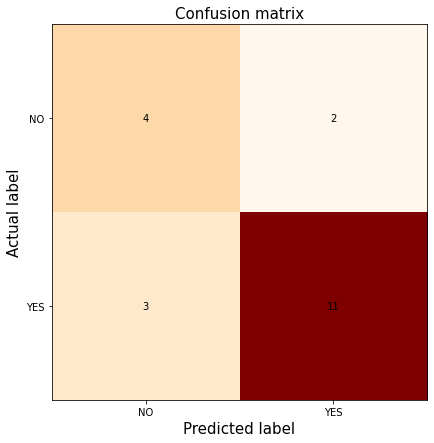

In [463]:
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap='OrRd')
plt.title('Confusion matrix', size = 15)
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["NO", "YES"], size = 10)
plt.yticks(tick_marks, ["NO", "YES"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

## Sınıflandırma Performansı Ölçütleri

In [2]:
Precision = 11/(11+2)
Recall = 11/(11+3)
Specificity = 4/(4+2)
print(Precision)
print(Recall)
print(Specificity)

0.8461538461538461
0.7857142857142857
0.6666666666666666


Precision = %84
Recall = %78
Specificity = %66

# Kümeleme İşlemleri
## 1)K-Means

Veri noktalarını belli küme merkezlerine olan uzaklığı minimize edilmiş k adet kümeye böler. Random veya manuel olarak seçilebilen ilk küme merkezlerinden sonra veriler her iterasyonda kendilerine en yakın küme merkezlerine ve dolayısıyla ilgili kümeye dahil edilir ve yeni bir küme merkezi elde edilip bu işlem kümelerin içeriği artık değişmeyinceye kadar tekrarlanır.

In [370]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
kmn = KMeans(n_clusters = 2, random_state = 0)
kmn.fit(X_train)

KMeans(n_clusters=2, random_state=0)

In [366]:
predictions = kmn.predict(X_test)

In [373]:
labels = kmn.labels_
print('Accuracy :',accuracy_score(y_test,predictions))

Accuracy : 0.75


Görüldüğü üzere K-Means kümeleme algoritması test verisinde %75'lik bir başarı oranı sağladı. Fakat burada %75 veya %25 çıkması şans olacaktı çünkü etiketleme işlemini kontrol etmedik. Bunun için şöyle bir kontrol yeterli olacaktır :

In [377]:
print(pd.crosstab(y_train,labels))

col_0       0   1
Class/ASD        
0          15  15
1          13  35


Veri setindeki sıfırla labellanmış verilerin azlığı 0 yani NO labelı için kafa karıştırıcı sonuçlara yol açabiliyor fakat 1 yani YES label'larındaki eşleşmenin yanlış eşleşmelere oranına bakarsak verilerin KMeans tarafından doğru labellandığını fark edebiliriz. 

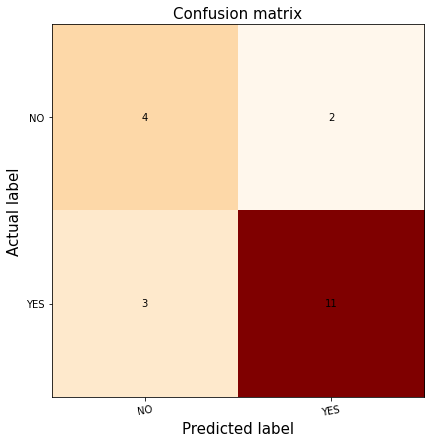

In [374]:
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap='OrRd')
plt.title('Confusion matrix', size = 15)
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["NO", "YES"], rotation=10, size = 10)
plt.yticks(tick_marks, ["NO", "YES"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

In [405]:
Precision = 11/(11+2)
Recall = 11/(11+3)
Specificity = 4/(4+2)
print('%',accuracy_score(y_test,predictions)*100)
print(Precision)
print(Recall)
print(Specificity)

% 75.0
0.8461538461538461
0.7857142857142857
0.6666666666666666


Precision = %84 Recall = %75 Specificity = %66

Text(0.5, 1.0, 'K-Means')

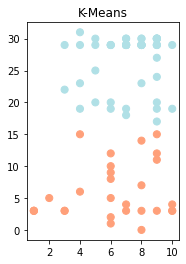

In [400]:
color_theme = np.array(['lightsalmon','powderblue'])
plt.subplot(1,2,2)
plt.scatter(x=X_train.result, y=X_train.contry_of_res, c = color_theme[labels],s=50)
plt.title('K-Means')

Görselleştirebilmek adına SelectKBest tarafından seçilen en önemli 2 feature olan 'result' ve 'contry_of_res' seçilip K-Means'in bu verilerin bağlı olduğu labelları hangi şekilde işaretlediğini görmek için kullanılmıştır.

## 2)SpectralClustering

Spectral Clustering algoritması veri noktalarına bir grafın birbirine bağlı düğümleri gözüyle bakar ve probleme clustering işleminden ziyade graph partitioning yaklaşımını uygular. Parametre olarak KNN algoritmasındaki k'yı ve cluster sayısını alır.

In [428]:
from sklearn.cluster import SpectralClustering

In [445]:
specl = SpectralClustering(
    n_clusters=2, 
    random_state=25, 
    n_neighbors=8, 
    affinity='nearest_neighbors'
)

In [446]:
labels = specl.fit_predict(X_train)
labels

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1])

In [447]:
accuracy_score(y_train,labels)

0.6153846153846154

Spectral Clustering bize bu eğitim sonunda %61'lik bir doğruluk oranı verdi.

In [435]:
print(pd.crosstab(y_train,labels))

col_0       0   1
Class/ASD        
0          19  11
1          19  29


Burada da label'ları inceleyerek Spectral Clustering algoritmasının bizim sahip olduğumuz gerçek label'larla uyumlu etiketleme yaptığını söyleyebiliriz.

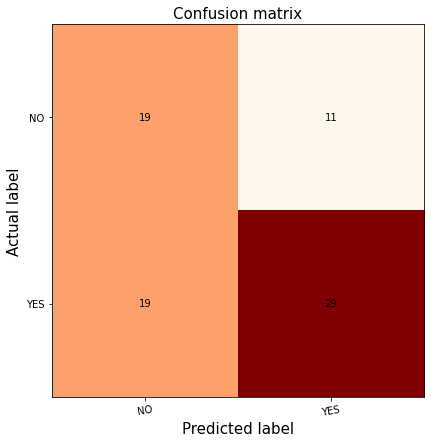

In [448]:
cm = metrics.confusion_matrix(y_train, labels)
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap='OrRd')
plt.title('Confusion matrix', size = 15)
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["NO", "YES"], rotation=10, size = 10)
plt.yticks(tick_marks, ["NO", "YES"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

In [449]:
Precision = 29/(29+11)
Recall = 29/(29+19)
Specificity = 19/(19+11)
print('%',accuracy_score(y_train,labels)*100)
print(Precision)
print(Recall)
print(Specificity)

% 61.53846153846154
0.725
0.6041666666666666
0.6333333333333333


Precision = %72 Recall = %60 Specificity = %63

Text(0.5, 1.0, 'Spectral Clustering')

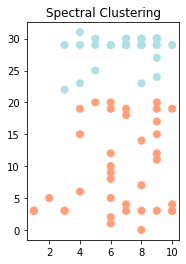

In [450]:
color_theme = np.array(['lightsalmon','powderblue'])
plt.subplot(1,2,2)
plt.scatter(x=X_train.result, y=X_train.contry_of_res, c = color_theme[labels],s=50)
plt.title('Spectral Clustering')

## 3)BIRCH Clustering

Balanced Iterative Reducing and Clustering using Hierarchies (BIRCH) öncelikle büyük veri setlerinin olabildiğince büyük bilgi içeren küçük ve kompakt bir özetini çıkararak bu büyük veri setlerini sıralamayı amaçlayan bir kümeleme algoritmasıdır. Bu küçük ve yoğun veri setlerine Clustering Feature (CF) denir.Büyük veri setleriyle direkt olarak uğraşmak yerine bu küçük ve yoğun veri setini kümeler ve büyük bir iş yükünden kurtulmuş olur. Bu kümeler direkt sonuç olarak verilebileceği gibi diğer kümeleme algoritmalarına input olarak da verilebilir.

In [451]:
from sklearn.cluster import Birch
brc = Birch(n_clusters=2)
brc.fit(X_train)

Birch(n_clusters=2)

In [455]:
labels = brc.predict(X_test)
labels

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1],
      dtype=int64)

In [458]:
print('Accuracy : %',accuracy_score(y_test,labels)*100)

Accuracy : % 70.0


BIRCH Clustering algoritması test veri seti için bize %70'lik bir doğruluk oranı verdi.

In [459]:
aa = brc.labels_
print(pd.crosstab(y_train,aa))

col_0       0   1
Class/ASD        
0          19  11
1          19  29


Doğru label'larla işlem yaptığımızı da bu tabloyla doğrulamış olduk.

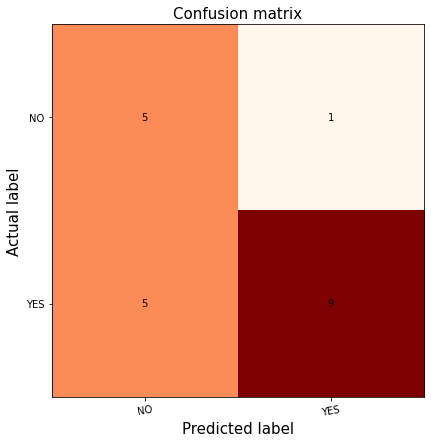

In [460]:
cm = metrics.confusion_matrix(y_test, labels)
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap='OrRd')
plt.title('Confusion matrix', size = 15)
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["NO", "YES"], rotation=10, size = 10)
plt.yticks(tick_marks, ["NO", "YES"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

In [461]:
Precision = 9/(9+1)
Recall = 9/(9+5)
Specificity = 5/(5+1)
print('%',accuracy_score(y_test,labels)*100)
print(Precision)
print(Recall)
print(Specificity)

% 70.0
0.9
0.6428571428571429
0.8333333333333334


Precision = %90 Recall = %64 Specificity = %83

Text(0.5, 1.0, 'BIRCH Clustering')

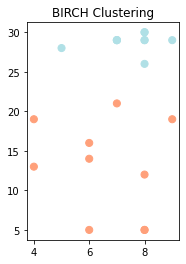

In [462]:
color_theme = np.array(['lightsalmon','powderblue'])
plt.subplot(1,2,2)
plt.scatter(x=X_test.result, y=X_test.contry_of_res, c = color_theme[labels],s=50)
plt.title('BIRCH Clustering')

# Kerem Yolcu
# 16011067